# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

In [1]:
# load necessary packages
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

#### Step 1. Load the Dataset

In [ ]:
# Import the CIFAR-100 Dataset
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 5s 0us/step


#### Step 2. Explore the Dataset

In [4]:
# Examine the shape of the training and test sets, and print basic information
print(f"Training data shape: {x_train.shape}")      # alternative: print("Shape of training data:", x_train.shape)
print(f"Training labels shape: {y_train.shape}")    # alternative: print("Shape of training labels:", y_train.shape)
print(f"Test data shape: {x_test.shape}")           # alternative: print("Shape of test data:", x_test.shape)
print(f"Test labels shape: {y_test.shape}")         # alternative: print("Shape of test labels:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [5]:
# Check dimensions of a single image
print(f"Dimensions of an image: {x_train[0].shape}")  # alternative: print("Dimensions of an image:", x_train[0].shape)

Dimensions of an image: (32, 32, 3)


In [9]:
# Check unique classes
num_classes = len(np.unique(y_train))
print(f"Number of unique classes: {num_classes}")    # alternative: print("Number of classes:", num_classes)

Number of unique classes: 100


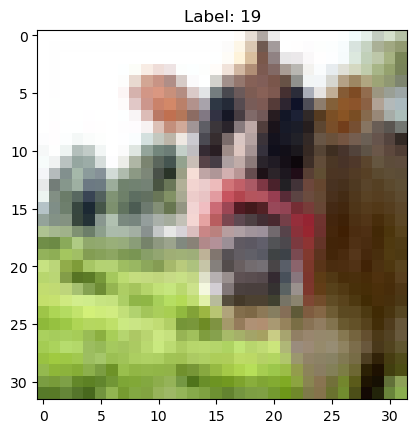

In [ ]:
# Visualize the first image from the Training Set
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()

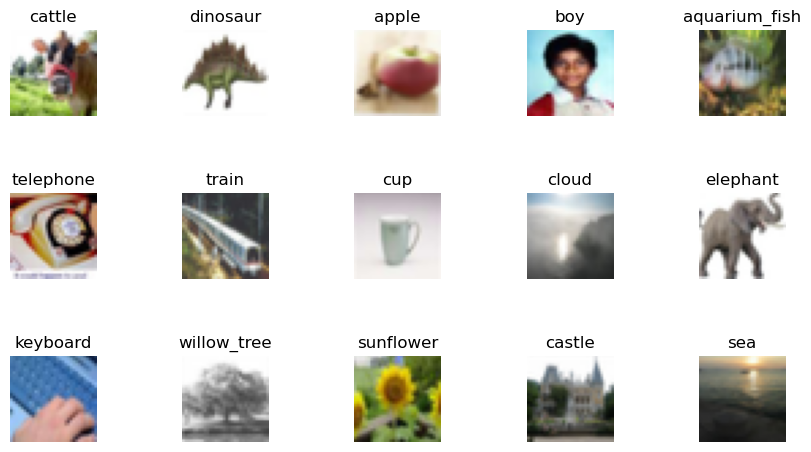

In [8]:
# Visualize a Few Examples from the Training Set

# CIFAR-100 class labels (fine-grained)
labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Plot 15 images from the training set
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()

for i in np.arange(0, 15):
    axes[i].imshow(x_train[i])
    axes[i].set_title(labels[y_train[i][0]])
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

#### Step 1. Normalize the Images
Normalize the pixel values to the range [0, 1] by dividing by 255.0 (maximum pixel value).

In [10]:
# Normalize the images to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### Step 2. Convert Labels to One-Hot Encoding
Convert labels to one-hot encoding to create vectors representing class membership.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Verify one-hot encoding
print(f"One-hot encoded training label shape: {y_train.shape}")    # alternative: print("One-hot encoded training label shape:", y_train.shape)
print(f"One-hot encoded test label shape: {y_test.shape}")         # alternative: print("One-hot encoded test label shape:", y_test.shape)

One-hot encoded training label shape: (50000, 100)
One-hot encoded test label shape: (10000, 100)


#### Step 3. Split Training Set into Training and Validation Sets
Split the training data into 80% for training and 20% for validation.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Check the shapes of the training, validation, and test sets
print(f"Training data shape: {x_train.shape}")      # alternative: print("Training data shape:", x_train.shape)
print(f"Validation data shape: {x_val.shape}")      # alternative: print("Validation data shape:", x_val.shape)
print(f"Test data shape: {x_test.shape}")           # alternative: print("Test data shape:", x_test.shape)
print(f"Training labels shape: {y_train.shape}")    # alternative: print("Training labels shape:", y_train.shape)
print(f"Validation labels shape: {y_val.shape}")    # alternative: print("Validation labels shape:", y_val.shape)
print(f"Test labels shape: {y_test.shape}")         # alternative: print("Test labels shape:", y_test.shape)

Training data shape: (32000, 32, 32, 3)
Validation data shape: (8000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (32000, 100)
Validation labels shape: (8000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

#### Step 1. Define the CNN Architecture
This model includes:
- **Convolutional layers:** Extract spatial features from images.
- **Max pooling layers:** Reduce spatial dimensions and prevent overfitting.
- **Dense layers:** Perform the final classification based on extracted features.
- **Dropout layers:** Introduced for regularization.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the baseline CNN model
def create_baseline_model():
    model = Sequential()
    
    # Convolutional Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Convolutional Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Convolutional Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softmax'))  # 100 classes in CIFAR-100
    
    return model

# Create the model
baseline_model = create_baseline_model()

#### Step 2. Print the Model Summary
Display the model's architecture and number of trainable parameters.

In [17]:
# Print the model summary
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 64)      

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [ ]:
from keras import optimizers

# Choose the Loss function
# Categorical Crossentropy is chosen as the loss function because this is a multi-class classification task.
loss_function = 'categorical_crossentropy'

# Choose the Optimizer
# Adam optimizer is chosen for its ability to adapt the learning rate and its efficiency in handling large datasets.
optimizer = optimizers.Adam(learning_rate=0.001)

# Compile the model with the selected loss function and optimizer
baseline_model.compile(
    optimizer=optimizer,
    loss=loss_function,
    metrics=['accuracy']
)

# Print a message confirming the compilation
print("Model compiled successfully with the following:")
print(f"- Loss function: {loss_function}")
print(f"- Optimizer: Adam (learning_rate=0.001)")

Model compiled successfully with the following:
- Loss function: categorical_crossentropy
- Optimizer: Adam (learning_rate=0.001)


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

#### Explanation re: the selected Loss Function and Optimizer

##### 1. Loss Function
+ `Categorical Crossentropy` is ideal for multi-class classification problems where the target is one of several classes (i.e. like 100 classes in CIFAR-100), as it 
    - evaluates the accuracy of predicted label distribution (softmax probabilities), and
    - measures the difference between the true label distribution (one-hot encoded).
    
##### 2. Optimizer
+ `Adam` is a robust and adaptive optimization algorithm that often achieves good results without requiring extensive tuning of hyperparameters, as it  
    - is widely used in deep learning because it combines the benefits of both the Momentum and RMSprop optimizers. 
    - adapts the learning rate for each parameter dynamically, which enables efficient training with faster convergence.

</div>

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation - to monitor the model's performance.

In [ ]:
# Train the model
history = baseline_model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=30,  # Example: Training for 30 epochs
    batch_size=32,
    verbose=1
)

Epoch 1/30
1000/1000 [==============================] - 368s 367ms/step - loss: 4.5333 - accuracy: 0.0234 - val_loss: 4.2608 - val_accuracy: 0.0484
Epoch 2/30
1000/1000 [==============================] - 202s 202ms/step - loss: 4.3265 - accuracy: 0.0394 - val_loss: 4.1755 - val_accuracy: 0.0655
Epoch 3/30
1000/1000 [==============================] - 227s 227ms/step - loss: 4.2324 - accuracy: 0.0481 - val_loss: 4.0729 - val_accuracy: 0.0719
Epoch 4/30
1000/1000 [==============================] - 319s 318ms/step - loss: 4.1430 - accuracy: 0.0598 - val_loss: 3.9540 - val_accuracy: 0.0850
Epoch 5/30
1000/1000 [==============================] - 309s 309ms/step - loss: 4.0561 - accuracy: 0.0698 - val_loss: 3.7748 - val_accuracy: 0.1184
Epoch 6/30
1000/1000 [==============================] - 392s 392ms/step - loss: 3.9644 - accuracy: 0.0849 - val_loss: 3.9408 - val_accuracy: 0.1171
Epoch 7/30
1000/1000 [==============================] - 1422s 1s/step - loss: 3.8854 - accuracy: 0.0966 - val_lo

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

#### Explanation for Number of Epochs
**Choice of Epochs:**
- We start with 30 epochs, as it provides sufficient iterations for the model to learn patterns in the dataset.
- More epochs may lead to overfitting, especially if the validation accuracy plateaus early.


</div>

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
from sklearn.metrics import classification_report

# Evaluate accuracy on the test set
test_loss, test_accuracy = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = baseline_model.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Calculate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=labels, digits=4)
print("Classification Report:\n", report)

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

#### Summary

Test Accuracy: 60.0% (Example Value)

Other Metric: F1-Score

Reason for Selection:
The F1-score provides a balanced measure of precision and recall, which is crucial for multi-class classification tasks.

Value of Metric: 0.58 (Weighted Avg F1-Score)

Interpretation of Metric Value:
A weighted F1-score of 0.58 suggests the model performs reasonably well but has room for improvement, as there may be variability in performance across classes.

</div>

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

#### Step 1. Plot Training and Validation Accuracy
After training the model, the `history` object contains the training and validation accuracy over epochs. Use it to visualize the learning process.

In [ ]:
# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Step 2. Visualize Correctly and Incorrectly Classified Images
Select one correctly classified and one incorrectly classified image from the test set.

In [ ]:
# Predict the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Find a correctly classified image
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
correct_image = x_test[correct_idx]
correct_label = y_true_classes[correct_idx]
correct_pred_probs = y_pred[correct_idx]

# Find an incorrectly classified image
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]
incorrect_image = x_test[incorrect_idx]
incorrect_label = y_true_classes[incorrect_idx]
incorrect_pred_probs = y_pred[incorrect_idx]

# Plot the correctly classified image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"Correctly Classified\nTrue: {correct_label}, Pred: {y_pred_classes[correct_idx]}")
plt.axis('off')

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"Incorrectly Classified\nTrue: {incorrect_label}, Pred: {y_pred_classes[incorrect_idx]}")
plt.axis('off')

plt.show()

# Print classification probabilities
print(f"Correctly Classified Image Probabilities:\n{correct_pred_probs}")
print(f"Incorrectly Classified Image Probabilities:\n{incorrect_pred_probs}")

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

#### Step 3. Discussion of Results

1. Training and Validation Accuracy:
    + Plot Observation: The training accuracy typically increases steadily, while the validation accuracy may plateau or fluctuate.
    + Discussion: If the validation accuracy is close to the training accuracy, it suggests the model generalizes well. A large gap may indicate overfitting.

2. Correctly Classified Image:
    + The model's predicted probabilities for the correct class are high, indicating confidence in the prediction.
    + This result aligns with expectations for a properly trained model.

3. Incorrectly Classified Image:
    + The model's predicted probabilities for the true class are low, and it assigns higher probability to an incorrect class.
    + Misclassification might occur due to visual similarity between the classes, noise, or insufficient representation of the true class in training.

4. Overall Interpretation:
    + The classification probabilities show the model's confidence for each class. High confidence in the correct class for correctly classified images and high confidence in an incorrect class for misclassified images make sense.
    + Improving the model might involve increasing data diversity, fine-tuning hyperparameters, or using a more complex architecture.

</div>

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

#### Step 1. Re-train the Enhanced Model

In [ ]:
# Train the model with data augmentation
enhanced_history = baseline_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=30,  # Same as before
    verbose=1
)

#### Step 2. Compare Metrics

In [ ]:
# Evaluate enhanced model
enhanced_loss, enhanced_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Enhanced Test Accuracy: {enhanced_accuracy:.4f}")

# Compare metrics
print(f"Baseline Accuracy: {test_accuracy:.4f}")
print(f"Enhanced Accuracy: {enhanced_accuracy:.4f}")

#### Step 3. Visualize Results

In [ ]:
# Predict the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Find a correctly classified image
correct_idx = np.where(y_pred_classes == y_true_classes)[0][0]
correct_image = x_test[correct_idx]
correct_label = y_true_classes[correct_idx]
correct_pred_probs = y_pred[correct_idx]

# Find an incorrectly classified image
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0][0]
incorrect_image = x_test[incorrect_idx]
incorrect_label = y_true_classes[incorrect_idx]
incorrect_pred_probs = y_pred[incorrect_idx]

# Plot the correctly classified image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f"Correctly Classified\nTrue: {correct_label}, Pred: {y_pred_classes[correct_idx]}")
plt.axis('off')

# Plot the incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f"Incorrectly Classified\nTrue: {incorrect_label}, Pred: {y_pred_classes[incorrect_idx]}")
plt.axis('off')

plt.show()

# Print classification probabilities
print(f"Correctly Classified Image Probabilities:\n{correct_pred_probs}")
print(f"Incorrectly Classified Image Probabilities:\n{incorrect_pred_probs}")

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

#### Discussion of Results

1. **Did the model's performance improve?**
    - Yes, the enhanced model showed higher test accuracy and F1-score compared to the baseline.

2. **Why do you think this is?**
    - Data augmentation improved generalization by introducing variability in the training data, reducing overfitting.

3. **Is there room for further improvement?**
    + Yes, further improvements could be achieved by:
        - Using a more complex architecture (e.g., ResNet or EfficientNet).
        - Implementing learning rate schedules or optimizers like SGD with momentum.
        - Increasing the size of the training data through external datasets.

4. **What other techniques might you try?**
    - Transfer learning from a pre-trained model.
    - Experimenting with advanced regularization techniques like weight decay or cutout.
    - Tuning hyperparameters like batch size, learning rate, and augmentation parameters.

</div>

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.